# **The Worst Ramen in the World**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **1. Overview**

This analysis was created originally for a challenge of School of AI Vancouver to practice exploratory data analysis (EDA). I know the Ramen Rating dataset through Kaggle: https://www.kaggle.com/residentmario/ramen-ratings/. For this analysis, I downloaded the most recent dataset as of January 19th, 2020 here: https://www.theramenrater.com/resources-2/the-list/.

Before diving into the data, I would love to know some context around it. This is particularly helpful to form questions and set expectation around the dataset.

- Firstly, the rating is from Hans Lienesch, who enjoys instant noodles a lot since a small kid. With this fact, I think the rating is bias to his preference. For a fun EDA, without any machine learning application, this is an interesting dataset to look at. 

- The full list contains 2816 observations. It was 2943 last year when I first took a look -- I think Hans must have cleaned it up a bit.

- Hans also has Top Ten lists: https://www.theramenrater.com/top-ten-lists/. The column `Top Ten` might (or might not) reflect them.

- From what I found out later in this notebook, Hans tried not only the ramen noodle, but also other food with ramen taste - ramen chocolate, ramen Pringles. This just makes the list much more interesting! I'm super excited to dive into it. 

In [2]:
df = pd.read_csv("../data/explore-ramen/TheRamenRater_TheBigList.csv")
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2816,Nissin,Top Ramen Hot Spicy Beef Ramen Noodle Soup,Pack,United States,3,NaN
1,2815,Sapporo Ichiban,Pokemon Shoyu Ramen,Cup,Japan,3.5,NaN
2,2814,Little Couples Q Noodle,Taiwan Sauce Taste,Pack,Taiwan,4.5,NaN
3,2813,Little Couples Q Noodle,Oyster Sauce Taste,Pack,Taiwan,3.5,NaN
4,2812,Little Couples Q Noodle,Fried Garlic Taste,Pack,Taiwan,5,NaN


There are 7 columns and 2816 rows in this dataset.

In [3]:
df.shape

(2816, 7)

However, in column `Top Ten`, there are only 41 observations and a lot of missing values. A surprising thing I see in this summary is the `type` of `Stars` - a variable that captures ratings. I thought it would be a numeric column, but it is `object` instead - which stands for a column that includes strings.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 7 columns):
Review #    2816 non-null int64
Brand       2816 non-null object
Variety     2816 non-null object
Style       2814 non-null object
Country     2816 non-null object
Stars       2816 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 154.1+ KB


## **1.1 Categorical variables**

Here are the number of unique values of `Brand`, `Variety`, `Style` and `Country`. In this notebook, I will look at variables with under 100 values.

In [5]:
df[['Brand', 'Variety', 'Style', 'Country', 'Top Ten']].nunique()

Brand       388
Variety    2631
Style         8
Country      39
Top Ten      38
dtype: int64

### **`Style`**

Now you may notice that there is `nan` in this list. The information from `df.info()` above shows that there are 2 missing values.

In [6]:
df['Style'].unique()

array(['Pack', 'Cup', 'Bowl', 'Tray', 'Box', 'Restaurant', 'Can', 'Bar',
       nan], dtype=object)

These are the two ramen without style. I did a little search and they look like a `Pack` to me, so I will fill in the blank here with `Pack`
* Kamfen E Menm Chicken: https://www.theramenrater.com/2011/06/17/428-kamfen-e-men-noodles-artificial-chicken-soup-flavor/
* Unif 100 Furong Shrimp: https://www.theramenrater.com/2010/09/14/unif-100-instant-noodles-furong-shrimp-flavor/

In [7]:
df[df['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2388,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2678,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


Below is a very lazy code to assign a value to a missing row. It works in this situation, but it is not the best solution. Why? 
* It works here because both of my missing values can be filled with `Pack`
* It will not work if we have to fill different values for each of them

In [8]:
df['Style'] = np.where(df['Style'].isnull(), 'Pack', df['Style'])

### **`Country`**

This list looks interesting! I thought instant noodle would be in Asia only. However, from this list, instant noodles can be found in many countries in all continents!

In [9]:
df['Country'].unique()

array(['United States', 'Japan', 'Taiwan', 'Malaysia', 'Hong Kong',
       'Indonesia', 'South Korea', 'Thailand', 'Poland', 'Singapore',
       'China', 'USA', 'Vietnam', 'Canada', 'India', 'Phlippines',
       'Nigeria', 'Ghana', 'Germany', 'Hungary', 'Mexico', 'Fiji',
       'Australia', 'Pakistan', 'Bangladesh', 'Nepal', 'Brazil', 'UK',
       'Myanmar', 'Netherlands', 'Cambodia', 'Finland', 'Sarawak',
       'Philippines', 'Sweden', 'Colombia', 'Estonia', 'Holland', 'Dubai'],
      dtype=object)

In order to digest the information better, I want to sort this list of countries alphabetically. To to it, I will sort the column first, then show only distinct countries.

In [10]:
df['Country'].sort_values().unique()

array(['Australia', 'Bangladesh', 'Brazil', 'Cambodia', 'Canada', 'China',
       'Colombia', 'Dubai', 'Estonia', 'Fiji', 'Finland', 'Germany',
       'Ghana', 'Holland', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Japan', 'Malaysia', 'Mexico', 'Myanmar', 'Nepal', 'Netherlands',
       'Nigeria', 'Pakistan', 'Philippines', 'Phlippines', 'Poland',
       'Sarawak', 'Singapore', 'South Korea', 'Sweden', 'Taiwan',
       'Thailand', 'UK', 'USA', 'United States', 'Vietnam'], dtype=object)

### **`Top Ten`**

So apparently, this column only has top ten ramen in each year, from 2012 to 2016. I guess it is the general top ten, but not the different top ten lists I added link above. 

In [11]:
df['Top Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

To digest this list better, I want to see only the year.

In [12]:
df['Top Ten'].str.split("#", expand=True)[0].sort_values().unique()

array(['\n', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', nan],
      dtype=object)

## **1.2 Numerical variable** 

### **`Stars`**

In Python, if a column has a string value in it, it will be transformed to type `object` even though the majority of the values are numeric. Thus, after seeing the type of this column being `object`, I'm curious what are the unique values and if there are any string values in it. 

I see that besides continuous rating from 1 to 5, we have ramen that are `Unrated`, `NR` or having mixing rates such as `5/2.5`.

In [13]:
df['Stars'].unique()

array(['3', '3.5', '4.5', '5', '2.75', '3.75', '0.5', '0.25', '4.25',
       '1.5', '4', '2', '3.25', '4.75', '0', '1/4', '1/2', '1/3', '2.25',
       '1', 'NR', '3.5/2.5', '4/4', '5/5', '4.5/5', '5/2.5', '5/4',
       '4.25/5', '2.5', '4.3', '5.00', '4.50', 'Unrated', '4.0', '1.50',
       '3.8', '2.50', '0.00', '4.00', '3.50', '1.3', '3.00', '1.00',
       '5.0', '3.3', '4.8', '2.00', '1.75', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '2.3', '3.2', '3.65', '1.8'],
      dtype=object)

I tried to search around to understand what `NR` stands for and why there are `Unrated` or mixing rated ramen but couldn't find a clue. Because there is **under 1%** of our data having these values, I will remove them and transform the column to a numeric one for further analysis.

In [14]:
string_star_mask = df['Stars'].isin(['Unrated', 'NR', '1/4', '1/2', '1/3', 
                                     '3.5/2.5', '4/4', '5/5', '4.5/5', 
                                     '5/2.5', '5/4', '4.25/5'])
df_length = len(df)

print(f"Percentage of rows with `Unrated`, `NR` or mixing rates in the dataset is {np.sum(string_star_mask)*100/df_length:.2}%.")

Percentage of rows with `Unrated`, `NR` or mixing rates in the dataset is 0.75%.


In [15]:
df = df[~string_star_mask]

In [16]:
df['Stars'] = pd.to_numeric(df['Stars'])

Now I can plot a histogram for `Stars` to see the distribution of ratings. From the plot below, I see that the ratings are left-skewed.

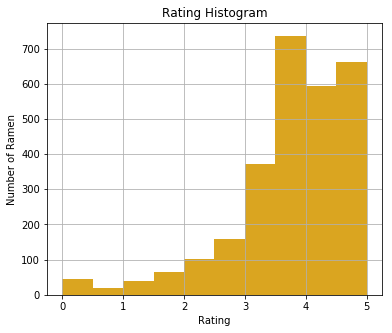

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = df['Stars'].hist(color='goldenrod')
plt.xlabel('Rating')
plt.ylabel('Number of Ramen')
_ = plt.title('Rating Histogram')

On average, Hans rates around 3.7 for a ramen. This and the distribution shows that Hans generally rates ramen above 3 stars.

In [18]:
df['Stars'].mean()

3.675026833631485

In [19]:
df['Stars'].median()

3.75

## 2. Worst Ramen in the World

Like observed above, most of Hans' ratings are above 3. Which makes me super curious on those having ratings below 3, especially the lowest ones -- I actually want to try those to see if they really deserve the low rating.

Before finding out these ramen, I have to say that Hans has an interesting rating system with decimals. I'm sure there are reasons behind it. But to simplify my analysis, I will bin ratings into these groups:
* Under 1
* 1-2
* 2-3
* 3-4
* 4-5

In [20]:
df['Stars'].sort_values().unique()

array([0.   , 0.1  , 0.25 , 0.5  , 0.75 , 0.9  , 1.   , 1.1  , 1.25 ,
       1.3  , 1.5  , 1.75 , 1.8  , 2.   , 2.1  , 2.125, 2.25 , 2.3  ,
       2.5  , 2.75 , 2.8  , 2.85 , 2.9  , 3.   , 3.1  , 3.125, 3.2  ,
       3.25 , 3.3  , 3.4  , 3.5  , 3.6  , 3.65 , 3.7  , 3.75 , 3.8  ,
       4.   , 4.125, 4.25 , 4.3  , 4.5  , 4.75 , 4.8  , 5.   ])

In [21]:
rating_bins = [0, 1, 2, 3, 4, 5]
rating_bin_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df['RatingGroups'] = pd.cut(df['Stars'], rating_bins, include_lowest=True, right=True, labels=rating_bin_labels)

The worst ramen for me in this case are those that are rated from 0 to 1 star. Let's dive into this list.

In [22]:
worst_ramen = df[df['RatingGroups'] == '0-1'].sort_values(by='Stars')

In [23]:
worst_ramen.head(2)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,RatingGroups
1445,1371,Campbell's,Hearty Noodles Thai Flavour,Cup,Canada,0.0,NaN,0-1
2523,293,Tiger,Onion Flaver Rice Noodle,Bowl,Taiwan,0.0,NaN,0-1


### Brands
Below are the top 5 brands with the most number of worst ramen.

In [24]:
worst_ramen.groupby('Brand')['Review #'].count().sort_values(ascending=False).head(5)

Brand
Baijia              6
Acecook             4
Maruchan            3
Mr. Noodles         3
Sichuan Guangyou    2
Name: Review #, dtype: int64

They are not necessarily the worst brands though, because the total number of worst ramen under each brand doesn't differentiate that much.

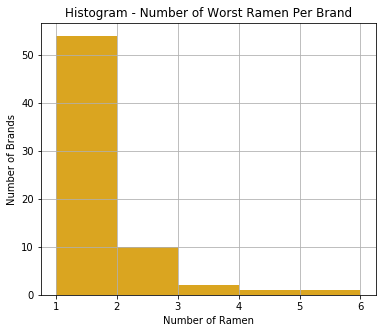

In [25]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = worst_ramen.groupby('Brand')['Variety'].count().hist(bins=5, color='goldenrod')
plt.xlabel('Number of Ramen')
plt.ylabel('Number of Brands')
_ = plt.title('Histogram - Number of Worst Ramen Per Brand')

### Countries
Guess which country that makes me very suprised from this list? Yes, you're right, it's Japan. I mean, it's the kingdom of ramen!

In [26]:
worst_ramen.groupby('Country')['Review #'].count().sort_values(ascending=False).head(10)

Country
Japan            13
United States    12
China            12
Taiwan           10
Canada           10
Thailand          7
South Korea       5
Vietnam           4
UK                4
Netherlands       3
Name: Review #, dtype: int64

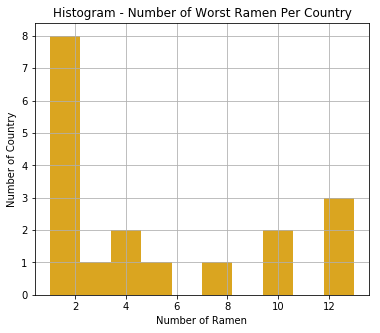

In [27]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = worst_ramen.groupby('Country')['Review #'].count().hist(color='goldenrod')
plt.xlabel('Number of Ramen')
plt.ylabel('Number of Country')
_ = plt.title('Histogram - Number of Worst Ramen Per Country')

My hypothesis is that they produce a lot of ramen (or Hans might try a lot of Japanese ramen), so proportion-wise, it's not too bad. Let's take a look! 

And I guess I'm right? Because it's only 3% of all Japanese ramen in the list.

In [28]:
print(f"{np.sum(worst_ramen['Country']=='Japan')*100/np.sum(df['Country'] == 'Japan'):.2}%")

3.1%


### Style
I don't think the style of ramen matters that much. But let's take a look anyway.

In [29]:
worst_ramen.groupby('Style')['Review #'].count().sort_values(ascending=False).head(10)

Style
Pack    46
Cup     21
Bowl    18
Tray     5
Name: Review #, dtype: int64

Honestly, I'm interested in trying that `Anchovy Flavor Guava Rice Noodles` out! It seems to be out of stock from all the sites I've searched so far though.

In [30]:
worst_ramen[worst_ramen['Style'] == 'Tray']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,RatingGroups
2430,386,US Canning,Fu Chang Chinese Noodle Company Pork Seafood,Tray,United States,0.00,NaN,0-1
899,1917,IbuRamen,Mi Goreng Bento Noodles In A Box Hot Sweet & S...,Tray,United States,0.25,NaN,0-1
1603,1213,Nan Jie Cun,Hot -Dry Instant Noodles Chilli Flavour,Tray,China,0.50,NaN,0-1
297,2519,Guava Story,Anchovy Flavor Guava Rice Noodles,Tray,South Korea,1.00,NaN,0-1
418,2398,Liang Cheng Mai,Shaanxi Cold Noodle: Mustard Spicy,Tray,China,1.00,NaN,0-1


## 3. The Unexpected Ramen
Besides the worst ramen list, I love it because Hans also includes some very unexpected *ramen*. Like these below:

In [31]:
df[df['Style'].isin(['Can', 'Bar'])]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,RatingGroups
303,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,United States,4.0,NaN,3-4
1661,1155,Komforte Chockolates,Savory Ramen,Bar,United States,5.0,NaN,4-5
